In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from deepface import DeepFace

In [ ]:
# dir(cv)

In [2]:
img = cv.imread('./sample_images/happyboy.jpeg')

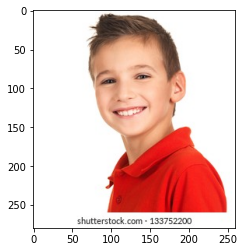

In [3]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));

In [4]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:11<00:00,  2.76s/it]   


In [6]:
predictions

{'emotion': {'angry': 1.9544260718862132e-14,
  'disgust': 2.687869173575275e-16,
  'fear': 1.4189272998822214e-09,
  'happy': 99.9999821186055,
  'sad': 1.2352002969776687e-09,
  'surprise': 6.625600105040453e-14,
  'neutral': 1.8312114161838247e-05},
 'dominant_emotion': 'happy',
 'region': {'x': 60, 'y': 39, 'w': 123, 'h': 123},
 'age': 23,
 'gender': 'Man',
 'race': {'asian': 1.3874134875782422,
  'indian': 0.6747411500508279,
  'black': 0.08264756089955931,
  'white': 65.15673787335979,
  'middle eastern': 11.574124489672451,
  'latino hispanic': 21.124332912226492},
 'dominant_race': 'white'}

In [7]:
faceCascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [8]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# printing facecascade.empty()

faces = faceCascade.detectMultiScale(gray, 1.1,4)

# drawing a rectangular around he faces
for (x,y,w,h) in faces:
    cv.rectangle(img, (x,y),(x+w, y+h), (0,255,0),2)

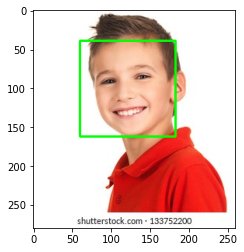

In [9]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));

In [ ]:
font = cv.FONT_HERSHEY_SIMPLEX

# using putText() method for
# inserting text into video

cv.putText(img, predictions['dominant_emotion'],
           (0,50),
           font,1,
           (0,0,255),
           2, cv.LINE_4)

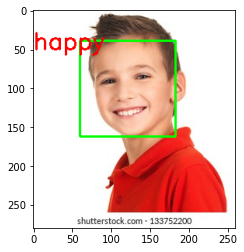

In [11]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));

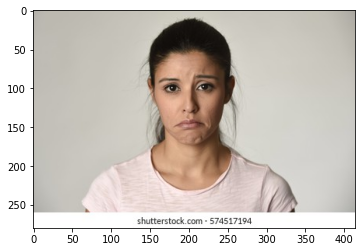

In [17]:
img = cv.imread('./sample_images/sadwomen2.jpeg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));

In [18]:
predictions = DeepFace.analyze(img)
predictions

Action: race: 100%|██████████| 4/4 [00:07<00:00,  1.76s/it]   


{'emotion': {'angry': 4.287073651275643e-06,
  'disgust': 8.185661397509388e-18,
  'fear': 1.3609540670741157e-05,
  'happy': 9.08914435278136e-06,
  'sad': 0.009111609329668811,
  'surprise': 5.269302074354385e-09,
  'neutral': 99.99085664858143},
 'dominant_emotion': 'neutral',
 'region': {'x': 139, 'y': 52, 'w': 121, 'h': 121},
 'age': 34,
 'gender': 'Woman',
 'race': {'asian': 2.9873655944902415,
  'indian': 6.659218717720356,
  'black': 0.6904606599164795,
  'white': 32.020954134578005,
  'middle eastern': 25.487071333774487,
  'latino hispanic': 32.15493347107571},
 'dominant_race': 'latino hispanic'}

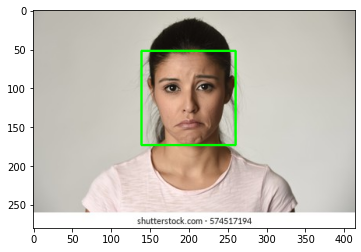

In [19]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# printing facecascade.empty()

faces = faceCascade.detectMultiScale(gray, 1.1,4)

# drawing a rectangular around he faces
for (x,y,w,h) in faces:
    cv.rectangle(img, (x,y),(x+w, y+h), (0,255,0),2)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));

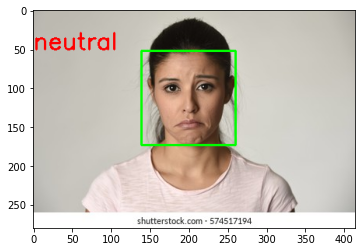

In [20]:
font = cv.FONT_HERSHEY_SIMPLEX

# using putText() method for
# inserting text into video

cv.putText(img, predictions['dominant_emotion'],
           (0,50),
           font,1,
           (0,0,255),
           2, cv.LINE_4)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));

# Realtime Demo

In [4]:
import cv2 as cv
from deepface import DeepFace

faceCascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv.VideoCapture(0) # we need to check if the webcam is opening up or not
if not cap.isOpened():
    cap = cv.VideoCapture(1) # if we have more than one webcams, we can access either one
if not cap.isOpened():
    raise IOError('Cannot Access Webcam')

while True:
    ret, frame = cap.read()
    result = DeepFace.analyze(frame, actions = ['emotion'],enforce_detection=False)
    
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # printing facecascade.empty()

    faces = faceCascade.detectMultiScale(gray, 1.1,4)

    # drawing a rectangular around he faces
    for (x,y,w,h) in faces:
        cv.rectangle(frame, (x,y),(x+w, y+h), (0,255,0),2)
    
    font = cv.FONT_HERSHEY_SIMPLEX

    # using putText() method for
    # inserting text into video

    cv.putText(frame, result['dominant_emotion'],
            (50,50),
            font,1,
            (0,0,255),
            2, cv.LINE_4)
    cv.imshow('Original Video',frame)
        
    if cv.waitKey(2) & 0xFF == ord('q'): 
        break

cap.release()
cv.destroyAllWindows()
